# Case study on Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Wine.csv")

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.shape

(178, 13)

In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Thus no null values are found

In [7]:
#describing the data
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

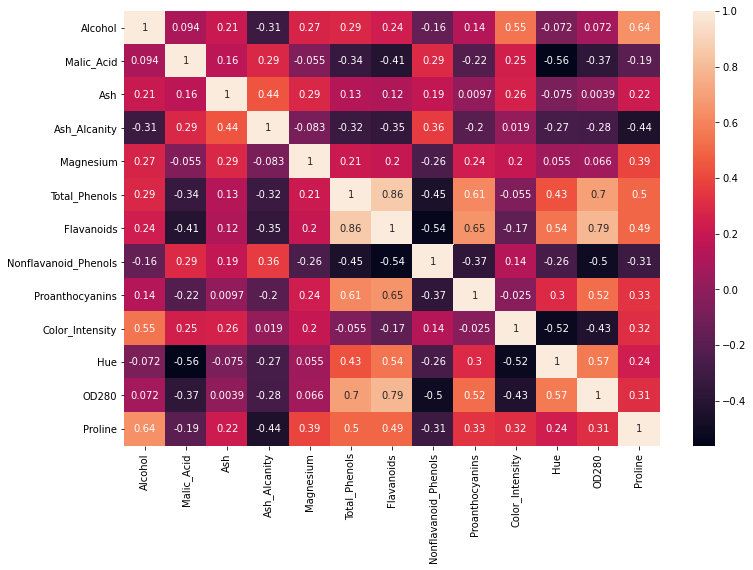

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
#to find correlation between values

OUTLIER DETECTION

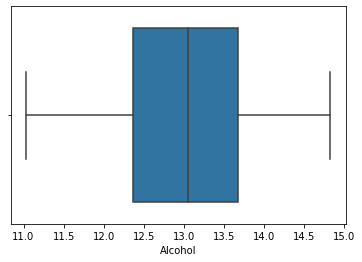

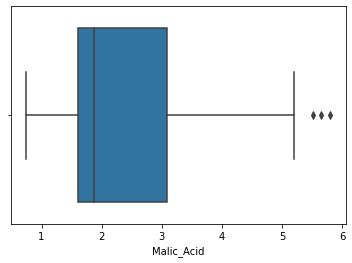

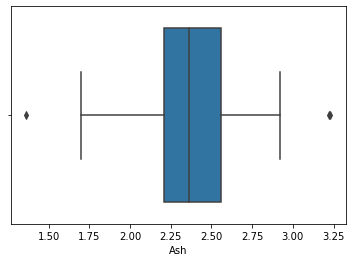

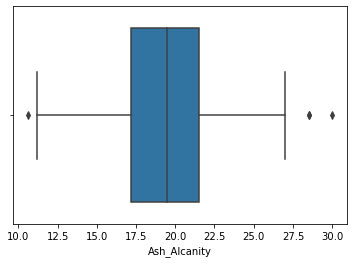

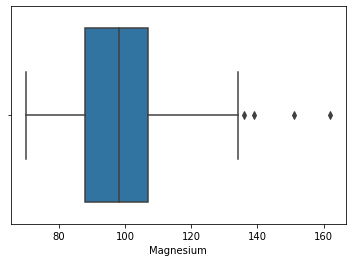

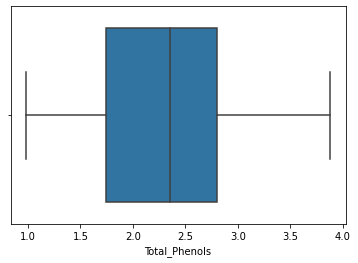

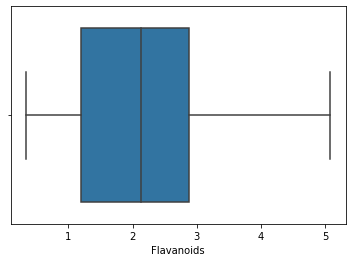

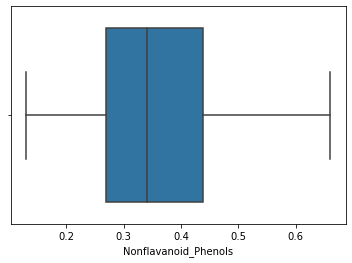

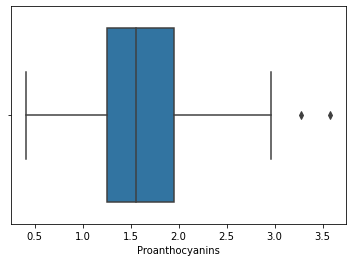

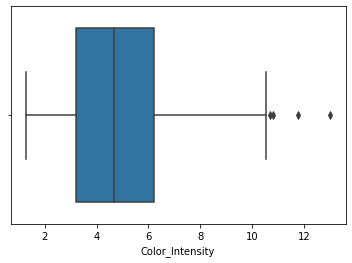

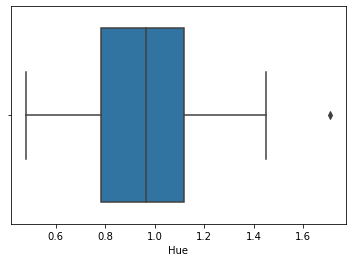

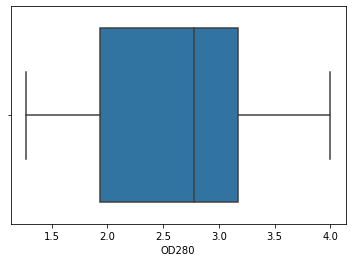

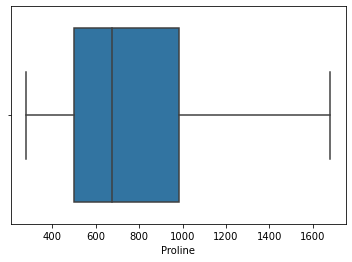

In [9]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.boxplot(data[col])

In [10]:
q1 = np.percentile(data['Malic_Acid'],25)
q3 = np.percentile(data['Malic_Acid'],75)

IQR = q3-q1

upper_lim=q3+IQR*1.5
lower_lim=q1-IQR*1.5

outliers = []
for i in data['Malic_Acid']:
    if (i>upper_lim)| (i<lower_lim):
        outliers.append(i)
print('Q1 = ',q1)
print('Q3 = ',q3)
print('IQR = ',IQR)
print('upper limit = ',upper_lim)
print('lower limit  = ',lower_lim)
print(' outliers = ',outliers)

Q1 =  1.6025
Q3 =  3.0825
IQR =  1.48
upper limit =  5.3025
lower limit  =  -0.6174999999999997
 outliers =  [5.8, 5.51, 5.65]


In [11]:
data['Malic_Acid']=np.where(data['Malic_Acid']>upper_lim,math.floor(upper_lim),
                          np.where(data['Malic_Acid']<lower_lim,math.ceil(lower_lim),data['Malic_Acid']))

In [12]:
q1 = np.percentile(data['Ash'],25)
q3 = np.percentile(data['Ash'],75)

IQR = q3-q1

upper_lim=q3+IQR*1.5
lower_lim=q1-IQR*1.5

outliers = []
for i in data['Ash']:
    if (i>upper_lim)| (i<lower_lim):
        outliers.append(i)
print('Q1 = ',q1)
print('Q3 = ',q3)
print('IQR = ',IQR)
print('upper limit = ',upper_lim)
print('lower limit  = ',lower_lim)
print(' outliers = ',outliers)

Q1 =  2.21
Q3 =  2.5575
IQR =  0.34750000000000014
upper limit =  3.0787500000000003
lower limit  =  1.6887499999999998
 outliers =  [3.22, 1.36, 3.23]


In [13]:
data['Ash']=np.where(data['Ash']>upper_lim,math.floor(upper_lim),
                          np.where(data['Ash']<lower_lim,math.ceil(lower_lim),data['Ash']))

In [14]:
q1 = np.percentile(data['Magnesium'],25)
q3 = np.percentile(data['Magnesium'],75)

IQR = q3-q1

upper_lim=q3+IQR*1.5
lower_lim=q1-IQR*1.5

outliers = []
for i in data['Magnesium']:
    if (i>upper_lim)| (i<lower_lim):
        outliers.append(i)
print('Q1 = ',q1)
print('Q3 = ',q3)
print('IQR = ',IQR)
print('upper limit = ',upper_lim)
print('lower limit  = ',lower_lim)
print(' outliers = ',outliers)

Q1 =  88.0
Q3 =  107.0
IQR =  19.0
upper limit =  135.5
lower limit  =  59.5
 outliers =  [151, 139, 136, 162]


In [15]:
data['Magnesium']=np.where(data['Magnesium']>upper_lim,math.floor(upper_lim),
                          np.where(data['Magnesium']<lower_lim,math.ceil(lower_lim),data['Magnesium']))

In [16]:
q1 = np.percentile(data['Proanthocyanins'],25)
q3 = np.percentile(data['Proanthocyanins'],75)

IQR = q3-q1

upper_lim=q3+IQR*1.5
lower_lim=q1-IQR*1.5

outliers = []
for i in data['Proanthocyanins']:
    if (i>upper_lim)| (i<lower_lim):
        outliers.append(i)
print('Q1 = ',q1)
print('Q3 = ',q3)
print('IQR = ',IQR)
print('upper limit = ',upper_lim)
print('lower limit  = ',lower_lim)
print(' outliers = ',outliers)

data['Proanthocyanins']=np.where(data['Proanthocyanins']>upper_lim,math.floor(upper_lim),
                          np.where(data['Proanthocyanins']<lower_lim,math.ceil(lower_lim),data['Proanthocyanins']))


Q1 =  1.25
Q3 =  1.95
IQR =  0.7
upper limit =  3.0
lower limit  =  0.20000000000000018
 outliers =  [3.28, 3.58]


In [17]:
q1 = np.percentile(data['Color_Intensity'],25)
q3 = np.percentile(data['Color_Intensity'],75)

IQR = q3-q1

upper_lim=q3+IQR*1.5
lower_lim=q1-IQR*1.5

outliers = []
for i in data['Color_Intensity']:
    if (i>upper_lim)| (i<lower_lim):
        outliers.append(i)
print('Q1 = ',q1)
print('Q3 = ',q3)
print('IQR = ',IQR)
print('upper limit = ',upper_lim)
print('lower limit  = ',lower_lim)
print(' outliers = ',outliers)



data['Color_Intensity']=np.where(data['Color_Intensity']>upper_lim,math.floor(upper_lim),
                          np.where(data['Color_Intensity']<lower_lim,math.ceil(lower_lim),data['Color_Intensity']))


Q1 =  3.2199999999999998
Q3 =  6.2
IQR =  2.9800000000000004
upper limit =  10.670000000000002
lower limit  =  -1.2500000000000009
 outliers =  [10.8, 13.0, 11.75, 10.68]


In [18]:
q1 = np.percentile(data['Hue'],25)
q3 = np.percentile(data['Hue'],75)

IQR = q3-q1

upper_lim=q3+IQR*1.5
lower_lim=q1-IQR*1.5

outliers = []
for i in data['Hue']:
    if (i>upper_lim)| (i<lower_lim):
        outliers.append(i)
print('Q1 = ',q1)
print('Q3 = ',q3)
print('IQR = ',IQR)
print('upper limit = ',upper_lim)
print('lower limit  = ',lower_lim)
print(' outliers = ',outliers)

data['Hue']=np.where(data['Hue']>upper_lim,math.floor(upper_lim),
                          np.where(data['Hue']<lower_lim,math.ceil(lower_lim),data['Hue']))

Q1 =  0.7825
Q3 =  1.12
IQR =  0.33750000000000013
upper limit =  1.6262500000000002
lower limit  =  0.2762499999999998
 outliers =  [1.71]


In [19]:
q1 = np.percentile(data['Ash_Alcanity'],25)
q3 = np.percentile(data['Ash_Alcanity'],75)

IQR = q3-q1

upper_lim=q3+IQR*1.5
lower_lim=q1-IQR*1.5

outliers = []
for i in data['Ash_Alcanity']:
    if (i>upper_lim)| (i<lower_lim):
        outliers.append(i)
print('Q1 = ',q1)
print('Q3 = ',q3)
print('IQR = ',IQR)
print('upper limit = ',upper_lim)
print('lower limit  = ',lower_lim)
print(' outliers = ',outliers)

Q1 =  17.2
Q3 =  21.5
IQR =  4.300000000000001
upper limit =  27.950000000000003
lower limit  =  10.749999999999998
 outliers =  [10.6, 30.0, 28.5, 28.5]


In [20]:
data['Ash_Alcanity']=np.where(data['Ash_Alcanity']>upper_lim,math.floor(upper_lim),
                          np.where(data['Ash_Alcanity']<lower_lim,math.ceil(lower_lim),data['Ash_Alcanity']))

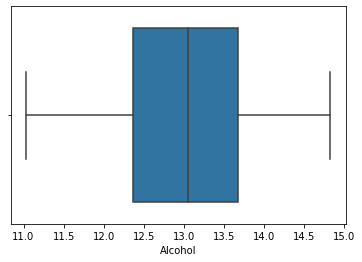

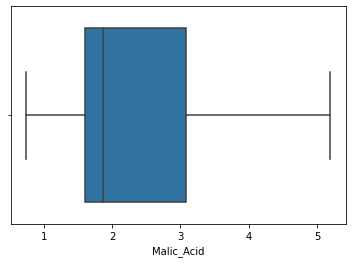

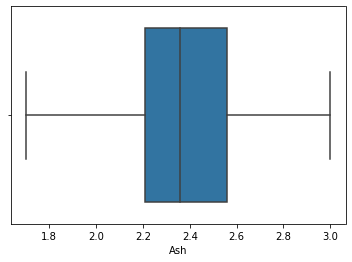

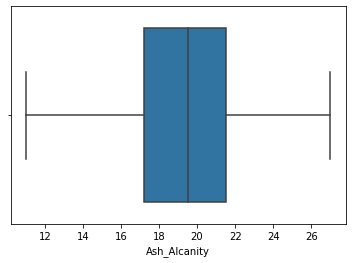

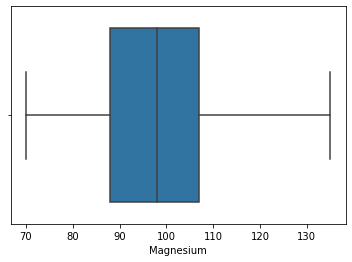

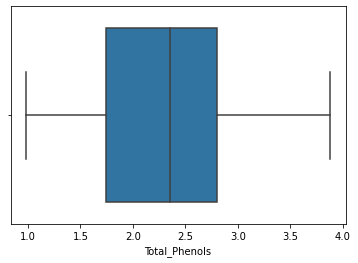

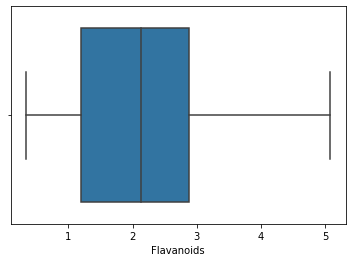

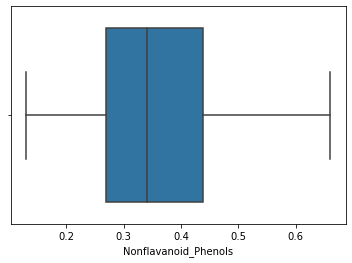

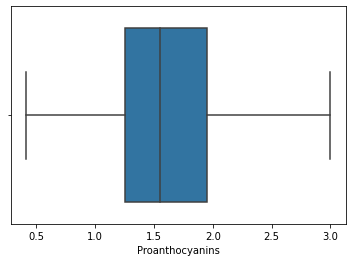

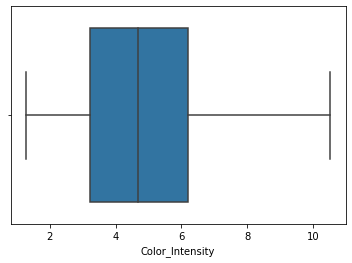

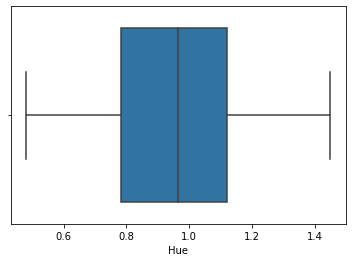

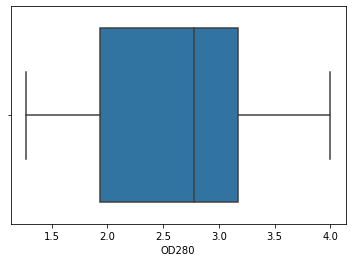

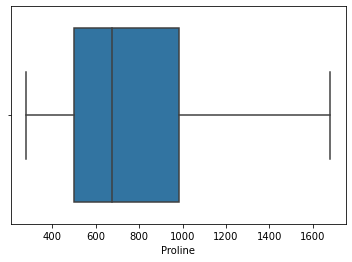

In [21]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.boxplot(data[col])

thus outliers are handled

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sdata = scaler.fit_transform(data)
sdata =pd.DataFrame(sdata)
sdata.describe().round(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028
min,-2.4342,-1.4627,-2.5960,-2.6159,-2.2082,-2.1072,-1.6960,-1.8682,-2.1130,-1.6870,-2.1440,-1.8951,-1.4932
25%,-0.7882,-0.6669,-0.6128,-0.6996,-0.8596,-0.8855,-0.8275,-0.7401,-0.6038,-0.8126,-0.7742,-0.9522,-0.7846
50%,0.0610,-0.4247,-0.0295,0.0113,-0.1103,0.0960,0.1061,-0.1761,-0.0558,-0.1501,0.0523,0.2377,-0.2337
75%,0.8361,0.6986,0.7385,0.6294,0.5641,0.8090,0.8491,0.6095,0.6539,0.5304,0.7542,0.7886,0.7582
max,2.2598,2.6430,2.4592,2.3294,2.6620,2.5395,3.0628,2.4024,2.5404,2.4774,2.2486,1.9609,2.9715


# K Means Clustering

In [23]:
X=data.iloc[:,[1,2]].values
X

array([[1.71, 2.43],
       [1.78, 2.14],
       [2.36, 2.67],
       [1.95, 2.5 ],
       [2.59, 2.87],
       [1.76, 2.45],
       [1.87, 2.45],
       [2.15, 2.61],
       [1.64, 2.17],
       [1.35, 2.27],
       [2.16, 2.3 ],
       [1.48, 2.32],
       [1.73, 2.41],
       [1.73, 2.39],
       [1.87, 2.38],
       [1.81, 2.7 ],
       [1.92, 2.72],
       [1.57, 2.62],
       [1.59, 2.48],
       [3.1 , 2.56],
       [1.63, 2.28],
       [3.8 , 2.65],
       [1.86, 2.36],
       [1.6 , 2.52],
       [1.81, 2.61],
       [2.05, 3.  ],
       [1.77, 2.62],
       [1.72, 2.14],
       [1.9 , 2.8 ],
       [1.68, 2.21],
       [1.5 , 2.7 ],
       [1.66, 2.36],
       [1.83, 2.36],
       [1.53, 2.7 ],
       [1.8 , 2.65],
       [1.81, 2.41],
       [1.64, 2.84],
       [1.65, 2.55],
       [1.5 , 2.1 ],
       [3.99, 2.51],
       [1.71, 2.31],
       [3.84, 2.12],
       [1.89, 2.59],
       [3.98, 2.29],
       [1.77, 2.1 ],
       [4.04, 2.44],
       [3.59, 2.28],
       [1.68,

220.88449101123598
57.3128
35.31822930735932
26.052666254954573
18.78061142770597
15.406638251337645
12.945679501753897
11.334159037467709
9.961712471424773
8.896161059057901
8.09359470640471
7.377921362854413
6.544942604559185
6.047568632756135
5.755204462465638


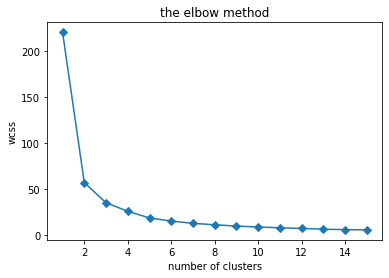

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init ="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)#will give wcss value
    print(kmeans.inertia_)
plt.plot(range(1,16),wcss,marker = 'D')
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

The number of clusters is 3 from elbow method.

In [25]:
kmeans=KMeans(n_clusters=3, init='k-means++',random_state =42)
y_kmeans = kmeans.fit_predict(X)
type(X)

numpy.ndarray

<function matplotlib.pyplot.show(close=None, block=None)>

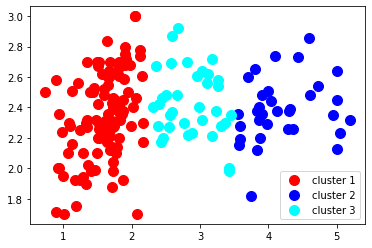

In [26]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s =100, c='red',label='cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s =100, c='blue',label='cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s =100, c='cyan',label='cluster 3')
plt.legend()
plt.show

In [27]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(X)
labels=model_kmeans.predict(X)
print(labels)

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 2
 1 1 0 0 0 0 0 1 1 1 0 2 2 2 0 0 0 0 2 0 1 1 2 0 1 2 2 2 1 1 1 1 2 2 2 2 2
 1 2 1 1 0 1 0 2 2 1 0 0 2 1 1 1 1 2 2 1 1 2 1 1 1 2 2 2 1 2]


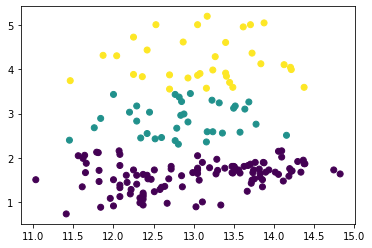

In [28]:
a=data['Alcohol']
b=data['Malic_Acid']
plt.scatter(a,b,c=labels)

In [29]:
sample=[[6,2]]
new_label=model_kmeans.predict(sample)
print(new_label)

[2]


In [30]:
from sklearn.metrics import silhouette_score

In [31]:
ss=silhouette_score(X,y_kmeans)
print(ss)

0.5437880570601157


In [32]:
silhouette_score(sdata,y_kmeans)

0.08569641100667168

Thus scaling has improved our model

# Hierarchial clustering

In HC we use dendrogram to find optimum number of clusters

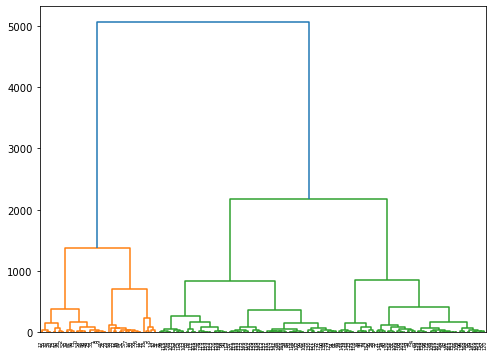

In [33]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(data,method='ward')
plt.figure(figsize=(8,6))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

The longest line of dendrogram cuts three lines, thus the optimum number of cluster is 3

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2,
       0, 1], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

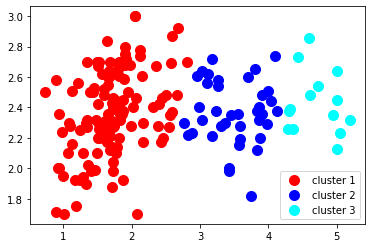

In [35]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1],s =100, c='red',label='cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1],s =100, c='blue',label='cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1],s =100, c='cyan',label='cluster 3')
plt.legend()
plt.show

In [36]:
ss=silhouette_score(X,y_hc)
print(ss)

0.5828639048219969


In [37]:
ss=silhouette_score(sdata,y_hc)
print(ss)

0.06836841726454573


Here also we can see that scaling has improved our model efficiency

# PCA for feature reduction

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(sdata)
x_pca = pca.transform(sdata)
x_pca.shape

(178, 2)

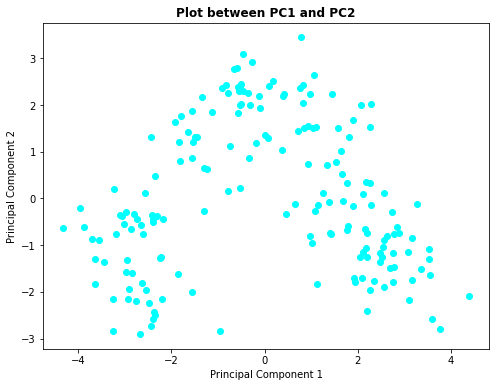

In [41]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:,0],x_pca[:,1],color='cyan')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Plot between PC1 and PC2',fontweight='bold')
plt.show()

In [40]:
#for visualisation